In [36]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point

%matplotlib inline

In [25]:
train = pd.read_json('Data/train.json')

In [53]:
ny = gpd.read_file("Data/ZillowNeighborhoods-NY/ZillowNeighborhoods-NY.shp")
nyc = ny[ny['City']=='New York'][['County', 'Name', 'RegionID', 'geometry']]
nyc

,County,Name,RegionID,geometry
2,Queens,Rego Park,6719,POLYGON ((-73.85629999999999 40.72303000000012...
5,Queens,Belle Harbor,10329,POLYGON ((-73.85618223699993 40.56810940300005...
10,New York,Roosevelt Island,20239,POLYGON ((-73.96143117599991 40.74851331600007...
13,Queens,Howard Beach,21970,POLYGON ((-73.85608525799972 40.65037135900031...
16,Queens,Breezy Point,37557,POLYGON ((-73.90962826099991 40.56552556300005...
21,Queens,Neponsit,42662,POLYGON ((-73.85990620999991 40.56700771800007...
23,Queens,East Elmhurst,45032,POLYGON ((-73.86286955999992 40.76695847800005...
25,Bronx,West Farms,48417,POLYGON ((-73.87729106686085 40.84245433729515...
27,Queens,Cambria Heights,50348,POLYGON ((-73.73909357074226 40.70117794641342...
33,Queens,Fresh Meadows,4819,POLYGON ((-73.76991237739721 40.74150740314482...


In [63]:
locations = train[['listing_id', 'latitude', 'longitude']].head(1000)
geometry = [Point(xy) for xy in zip(locations.longitude, locations.latitude)]
locations = locations.drop(['longitude', 'latitude'], axis=1)
crs = nyc.crs
geo_df = gpd.GeoDataFrame(locations, crs=crs, geometry=geometry)

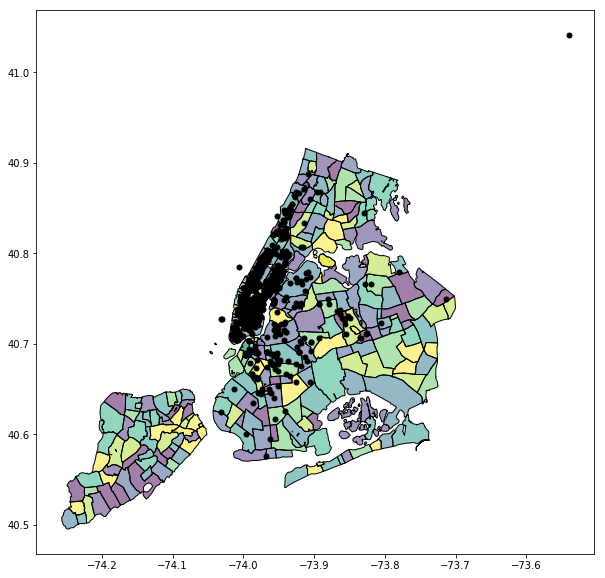

In [64]:
fig, ax = plt.subplots(1, figsize=(10,10))
nyc.plot(ax=ax)
geo_df.plot(ax=ax, color="black", markersize=5)

In [88]:
assigned = gpd.tools.sjoin(geo_df, nyc, how="left")
assigned = pd.DataFrame(assigned)
assigned.drop_duplicates('listing_id',inplace=True)

In [91]:
print(assigned.shape)
assigned.head()

(1000, 6)


,listing_id,geometry,index_right,County,Name,RegionID
10,7211212,POINT (-73.9425 40.7145),230.0,Kings,Williamsburg,199001
101,7152345,POINT (-73.961 40.6455),167.0,Kings,Flatbush,194737
102,7204899,POINT (-73.9932 40.7633),327.0,New York,Clinton,273289
1002,7208829,POINT (-73.9626 40.7617),313.0,New York,Upper East Side,270957
1004,7195591,POINT (-73.8792 40.7441),571.0,Queens,Elmhurst,403223
